Домашнее задание №1
====



In [357]:
# Импортируем нужные нам библиотеки
import pandas as pd
#from tabulate import tabulate
#import pathlib
#from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
#print(str(Path.cwd())+'\datatest\\bike-sharing.csv')

In [358]:
# Загружаем датасет, с которым мы будем работать
df = pd.read_csv('.\datatest\\bike-sharing.csv')

In [359]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [360]:
df = df[['dteday','cnt']]
df['dteday'] = pd.to_datetime(df['dteday'])

In [361]:
#Выберем агрегацию по месяцам
df.set_index('dteday',inplace=True)
df_agg = df.resample('M').sum()
df_agg.rename(columns = {'cnt' : 'sum'}, inplace = True) # Агрегируем по сумме
df_agg['mean'] = round(df.resample('M').mean(),2) # Округлим среднее до двух значений после запятой
df_agg['max'] = df.resample('M').max() # Агрегируем по максимуму
df_agg.head()

,sum,mean,max
dteday,,,
2011-01-31,38189,55.51,249
2011-02-28,48215,74.29,327
2011-03-31,64045,87.73,336
2011-04-30,94870,131.95,530
2011-05-31,135821,182.56,611


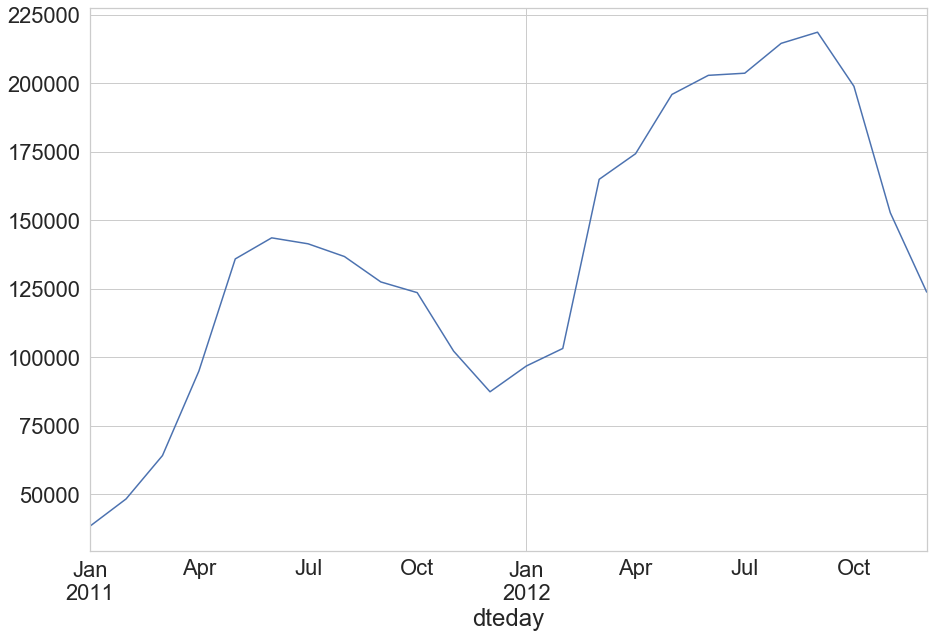

In [362]:
df_agg['sum'].plot()

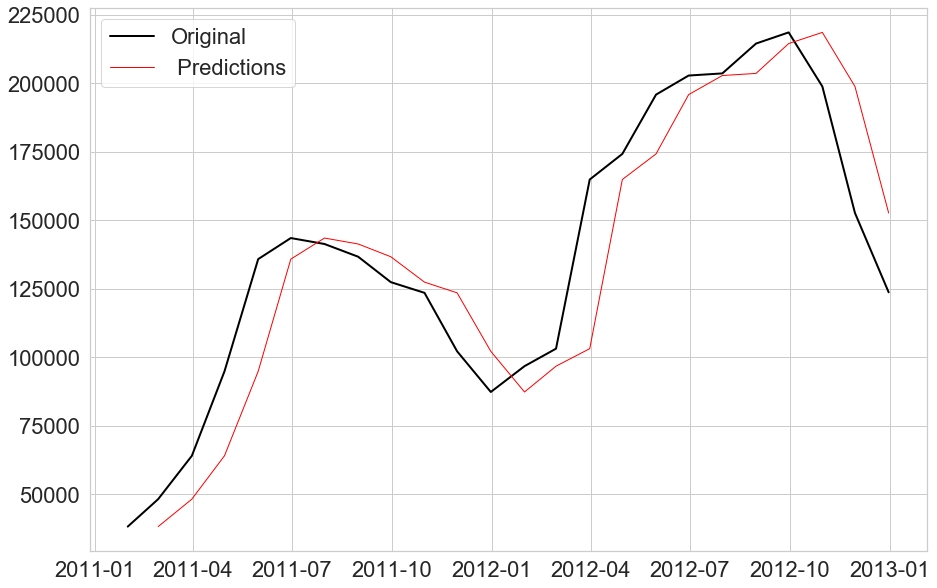

In [363]:
s = pd.Series(index = df_agg.index,
             data= df_agg['sum'].values)
y_hat = list()
y_hat.append(np.nan)
for i in range(1,len(s)):
    y_hat.append(s.values[i-1])
    
s_hat = pd.Series(index=s.index,
                 data=y_hat)

fig, ax = plt.subplots()
ax.plot(s, linewidth = 2, color='black',label = 'Original')
ax.plot(s_hat, linewidth = 1, color = 'red', label =' Predictions')
ax.legend()
plt.show()

In [364]:
df_agg['sum_hat'] = s_hat
df_agg.dropna(inplace=True)
#print('MSE = ', round(mean_squared_error(df_agg['sum'],df_agg['sum_hat']),2))
#print('MAE = ', round(mean_absolute_error(df_agg['sum'],df_agg['sum_hat']),2))
#print('R2 = ',  round(r2_score(df_agg['sum'],df_agg['sum_hat']),2))
#print('MRSE = ',round(np.sqrt(((df_agg['sum'] - df_agg['sum_hat']) ** 2).mean()),2))

val_sum = pd.DataFrame ({'R2':  [round(r2_score(df_agg['sum'],df_agg['sum_hat']),2)],
                         'MSE': [round(mean_squared_error(df_agg['sum'],df_agg['sum_hat']))], 
                        'MAE':  [round(mean_absolute_error(df_agg['sum'],df_agg['sum_hat']))], 
                        'MRSE': [round(np.sqrt(((df_agg['sum'] - df_agg['sum_hat']) ** 2).mean()))]                      
                        })
                            
display(val_sum)

,R2,MSE,MAE,MRSE
0,0.77,516612996.0,16853.0,22729.0


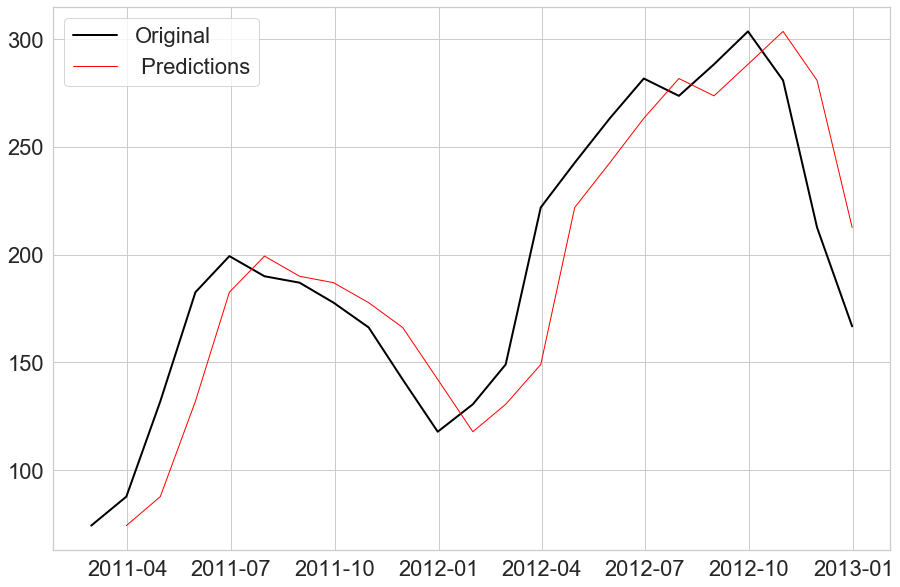

In [365]:
s2 = pd.Series(index = df_agg.index,
             data= df_agg['mean'].values)
y_hat = list()
y_hat.append(np.nan)
for i in range(1,len(s2)):
    y_hat.append(s2.values[i-1])
    
s2_hat = pd.Series(index=s2.index,
                 data=y_hat)

fig, ax = plt.subplots()
ax.plot(s2, linewidth = 2, color='black',label = 'Original')
ax.plot(s2_hat, linewidth = 1, color = 'red', label =' Predictions')
ax.legend()
plt.show()

In [366]:
df_agg['mean_hat'] = s2_hat
df_agg.dropna(inplace = True)
#print('MSE = ', mean_squared_error(df_agg['mean'],df_agg['mean_hat']))
#print('MAE = ', mean_absolute_error(df_agg['mean'],df_agg['mean_hat']))
#print('R2 = ', r2_score(df_agg['mean'],df_agg['mean_hat']))
#print('MRSE = ',np.sqrt(((df_agg['mean'] - df_agg['mean_hat']) ** 2).mean()))

val_mean = pd.DataFrame ({'R2':  [round(r2_score(df_agg['mean'],df_agg['mean_hat']),2)],
                         'MSE': [round(mean_squared_error(df_agg['mean'],df_agg['mean_hat']))], 
                        'MAE':  [round(mean_absolute_error(df_agg['mean'],df_agg['mean_hat']))], 
                        'MRSE': [round(np.sqrt(((df_agg['mean'] - df_agg['mean_hat']) ** 2).mean()))]                      
                        })
                            
display(val_mean)

,R2,MSE,MAE,MRSE
0,0.74,966.0,25.0,31.0


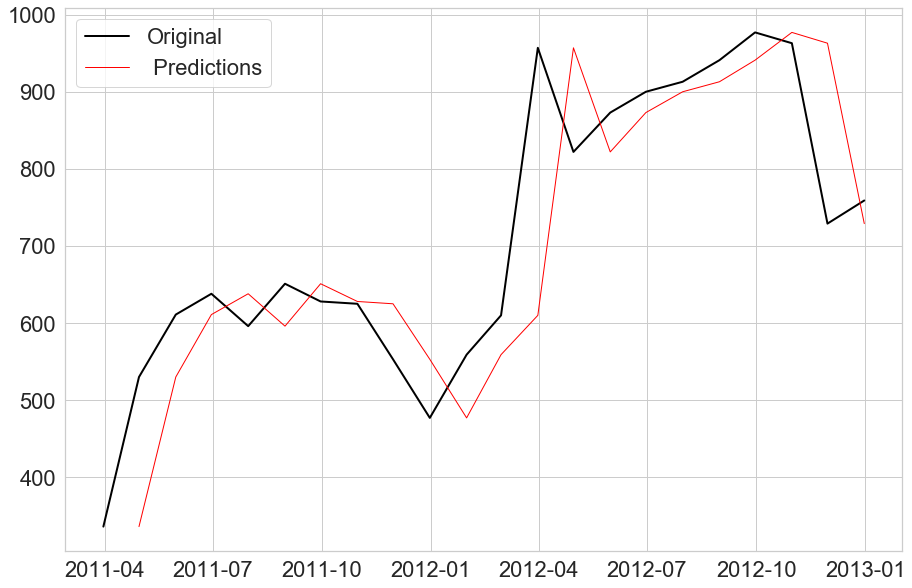

In [367]:
s3 = pd.Series(index = df_agg.index,
             data= df_agg['max'].values)
y_hat = list()
y_hat.append(np.nan)
for i in range(1,len(s3)):
    y_hat.append(s3.values[i-1])
    
s3_hat = pd.Series(index=s3.index,
                 data=y_hat)

fig, ax = plt.subplots()
ax.plot(s3, linewidth = 2, color='black',label = 'Original')
ax.plot(s3_hat, linewidth = 1, color = 'red', label =' Predictions')
ax.legend()
plt.show()

In [368]:
df_agg['max_hat'] = s3_hat
df_agg.dropna(inplace = True)
#print('MSE = ', mean_squared_error(df_agg['max'],df_agg['max_hat']))
#print('MAE = ', mean_absolute_error(df_agg['max'],df_agg['max_hat']))
#print('R2 = ', r2_score(df_agg['max'],df_agg['max_hat']))
#print('MRSE = ',np.sqrt(((df_agg['max'] - df_agg['max_hat']) ** 2).mean()))

val_max = pd.DataFrame ({'R2':  [round(r2_score(df_agg['max'],df_agg['max_hat']),2)],
                         'MSE': [round(mean_squared_error(df_agg['max'],df_agg['max_hat']))], 
                        'MAE':  [round(mean_absolute_error(df_agg['max'],df_agg['max_hat']))], 
                        'MRSE': [round(np.sqrt(((df_agg['max'] - df_agg['max_hat']) ** 2).mean()))]                      
                        })
                       
display(val_max)

,R2,MSE,MAE,MRSE
0,0.51,12886.0,77.0,114.0


Задание
====
Для тех же данных, что мы рассмотрели на лекции (bike sharing), сделать следующее:
* Выбрать самостоятельно уровень агрегации (день, неделя, месяц, год), а так же функцию агрегации (среднее, сумма, максимум). 
* Построить базовую наивную модель
* В этот раз применить принцип кросс-валидации для временных рядов, используя выбранную метрику ($R^2$, MSE, MAE, MRSE).


